### 1. 데이터 확인

In [34]:
import pandas as pd

%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf

fm.findSystemFonts()
plt.rcParams['font.family']= ["Malgun Gothic"]
plt.rcParams["axes.unicode_minus"]=False

In [35]:
data = pd.read_csv('./data/train_x_total.csv', encoding='utf-8-sig')

In [36]:
data.head()

,reviews,price,drink,dessert,service,customers,interior,view,parking,etc,trash
0,만족도 최상의 커피 맛집,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,찐 커피 맛집,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,로마노 진짜 달달하고 맛있고,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,아이스크림 라떼도 꼬소하고 달달하고 진짜 맛있어요!!,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,마리토쪼도 크림 부드럽고,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
keywords = ['price', 'drink', 'dessert', 'service', 'customers', 'interior', 'view', 'parking', 'etc', 'trash']

In [38]:
# 키워드 내 NA 값 0으로 변환
data[keywords] = data[keywords].fillna(0)

In [39]:
data.isna().sum()

reviews      3
price        0
drink        0
dessert      0
service      0
customers    0
interior     0
view         0
parking      0
etc          0
trash        0
dtype: int64

In [40]:
data = data.dropna()

In [41]:
data.duplicated('reviews').sum()

913

In [42]:
data.drop_duplicates('reviews', inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9379 entries, 0 to 10294
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reviews    9379 non-null   object 
 1   price      9379 non-null   float64
 2   drink      9379 non-null   float64
 3   dessert    9379 non-null   float64
 4   service    9379 non-null   float64
 5   customers  9379 non-null   float64
 6   interior   9379 non-null   float64
 7   view       9379 non-null   object 
 8   parking    9379 non-null   float64
 9   etc        9379 non-null   float64
 10  trash      9379 non-null   float64
dtypes: float64(9), object(2)
memory usage: 879.3+ KB


In [44]:
data['view'].unique()

array([0, '1', ';;;;;;'], dtype=object)

In [45]:
data.loc[data['view']==';;;;;;', 'view'] = 1

In [46]:
data['view'] = data['view'].apply(float)

In [47]:
temp = pd.Series({
    'price': data['price'].sum(),
    'drink': data['drink'].sum(),
    'dessert': data['dessert'].sum(),
    'service': data['service'].sum(),
    'customers': data['customers'].sum(),
    'interior': data['interior'].sum(),
    'view': data['view'].sum(),
    'parking': data['parking'].sum(),
    'etc': data['etc'].sum(),
    'trash': data['trash'].sum()   
}, index=keywords)

In [48]:
temp

price         270.0
drink        1505.0
dessert      2709.0
service       884.0
customers     402.0
interior     1365.0
view         1118.0
parking       170.0
etc           264.0
trash        1322.0
dtype: float64

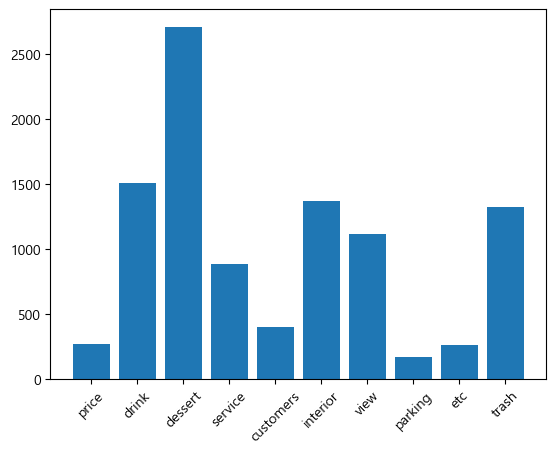

In [49]:
plt.bar(temp.index, temp.values) # 범주명, 값
plt.xticks(rotation=45)
plt.show()

In [50]:
data.to_csv("./data/train_x_final.csv", index=False, encoding='utf-8-sig')

### 2. 텍스트 데이터 분석

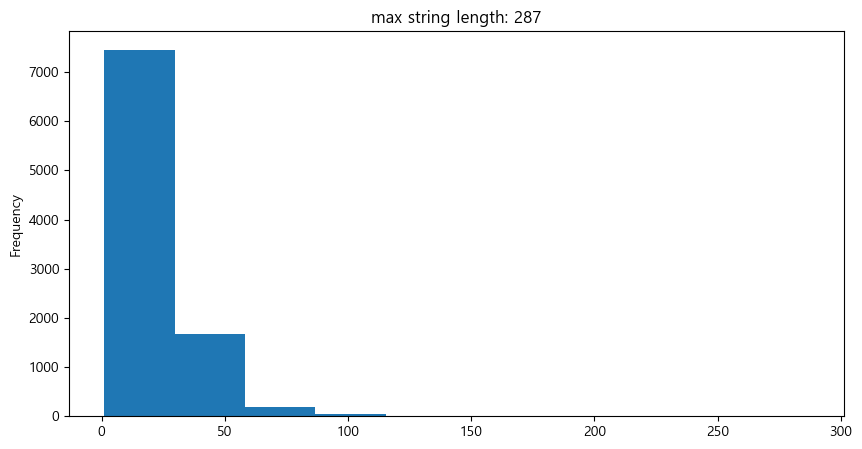

In [23]:
# 텍스트 길이 분포와 최대 길이를 확인합니다.
plt.figure(figsize=(10,5))
data['reviews'].str.len().plot.hist(title='max string length: '+str(max(data['reviews'].str.len())))
plt.show()

In [24]:
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type='sbg')

morph_analysis = lambda x: kiwi.tokenize(x) if type(x) is str else None
data['tokenized'] = data['reviews'].apply(morph_analysis)

In [26]:
nouns = ['NNG', 'NNP']
morphs = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
verbs = ['VV', 'VA']

In [27]:
reviews_nouns = []
reviews_morphs = []

for index, row in data.iterrows(): 
    if row['tokenized']:
        result_nouns = [token.form for token in row['tokenized'] if token.tag in nouns]
        result_morphs = [(token.form, token.tag) for token in row['tokenized'] if token.tag in morphs]
        result_morphs = [form+"다" if tag in verbs else form for form, tag in result_morphs]
        reviews_nouns.extend(result_nouns)
        reviews_morphs.extend(result_morphs)

In [28]:
from collections import Counter

reviews_nouns_frequency = Counter(reviews_nouns)
reviews_morphs_frequency = Counter(reviews_morphs)

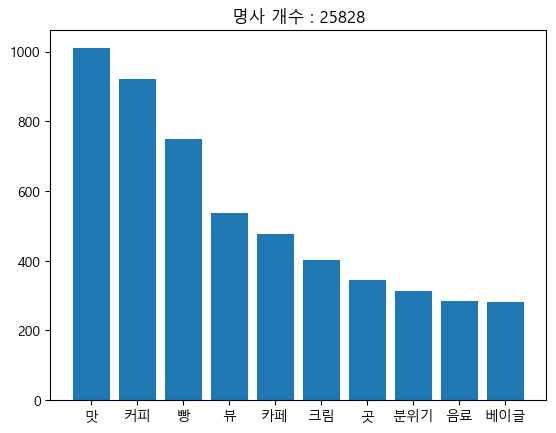

In [29]:
x = [tag for tag, count in reviews_nouns_frequency.most_common(10)]
y = [count for tag, count in reviews_nouns_frequency.most_common(10)]

plt.title("명사 개수 : " + str(len(reviews_nouns)))
plt.bar(x, y)
plt.show()

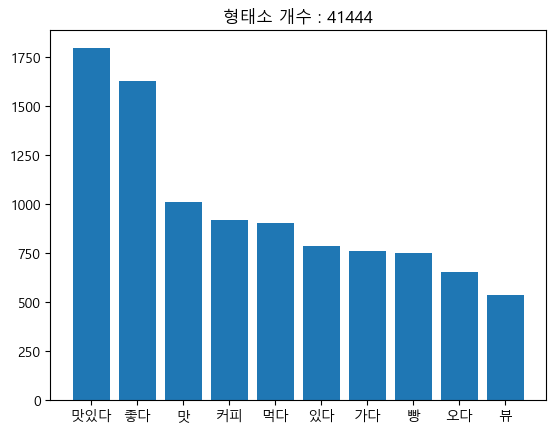

In [30]:
x = [tag for tag, count in reviews_morphs_frequency.most_common(10)]
y = [count for tag, count in reviews_morphs_frequency.most_common(10)]

plt.title("형태소 개수 : " + str(len(reviews_morphs)))
plt.bar(x, y)
plt.show()

### 3. 시각화

In [31]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('Malgun Gothic')

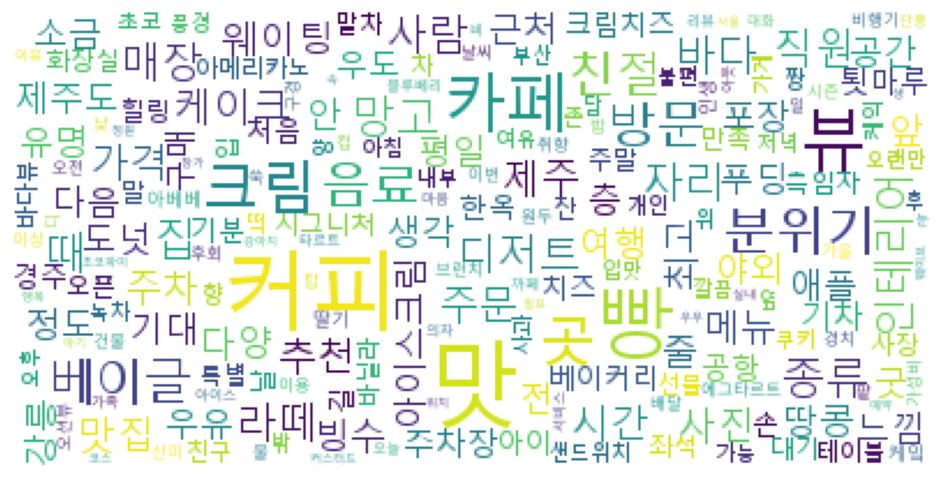

In [32]:
# 명사
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate_from_frequencies(reviews_nouns_frequency)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

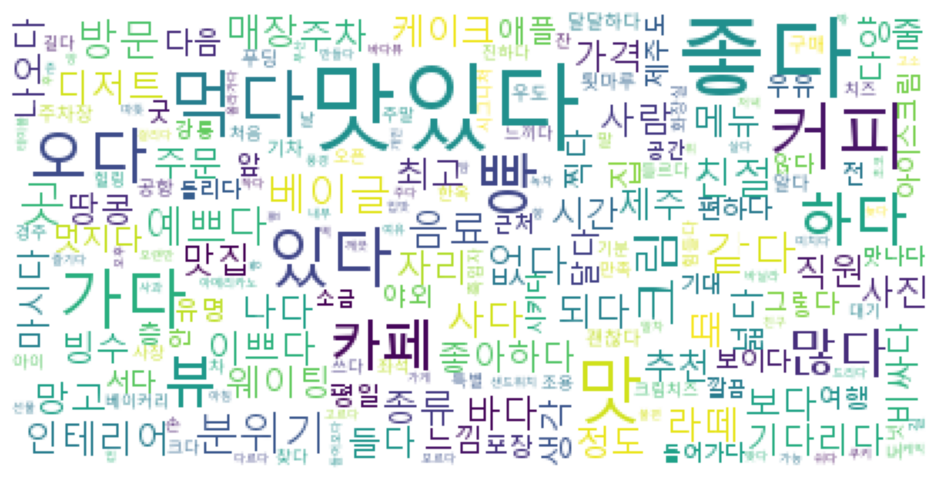

In [33]:
# 형용사
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate_from_frequencies(reviews_morphs_frequency)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()